#### Packages

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### Data

In [34]:
df=pd.read_csv(r'C:\Users\61406\Dropbox\PYTHON\Misinformation_data1.csv')
df.columns = [col.strip() for col in df.columns.get_level_values(0)]
df['claim'] = df['claim'].astype('category')
df['Denial technique'] = df['Denial technique'].astype('category')
df

,Denial technique,claim,year
0,3.01,2.1,2017
1,5.01,2.1,2015
2,1.01,2.1,2017
3,2.01,2.1,2017
4,5.01,2.1,2014
...,...,...,...
308,5.01,5.2,2015
309,2.01,5.2,2014
310,1.01,5.3,2017
311,2.12,5.3,2015


#### Group Data 


In [35]:

# Get unique years in the dataset
unique_years = df['year'].unique()

# Dictionary to store claim proportions for each year
claim_proportions_by_year = {}

# Iterate over each year
for year in unique_years:
    # Filter the DataFrame for the current year
    df_year = df[df['year'] == year]
    
    # Count the total number of claims within the current year
    total_claims_year = df_year['claim'].count()
    
    # Calculate proportions for each claim type within the current year
    claim_proportions_year = df_year['claim'].value_counts() / total_claims_year
    
    # Sort claim proportions by claim types
    claim_proportions_year_sorted = claim_proportions_year.sort_index()
    
    # Store claim proportions for the current year
    claim_proportions_by_year[year] = claim_proportions_year_sorted

# Print claim proportions for each year
for year, proportions in claim_proportions_by_year.items():
    print(f"Year {year}:")
    print(proportions)
    print()


Year 2017:
claim
2.1    0.106061
5.1    0.272727
5.2    0.590909
5.3    0.030303
Name: count, dtype: float64

Year 2015:
claim
2.1    0.086957
5.1    0.250000
5.2    0.619565
5.3    0.043478
Name: count, dtype: float64

Year 2014:
claim
2.1    0.033708
5.1    0.191011
5.2    0.775281
5.3    0.000000
Name: count, dtype: float64

Year 2023:
claim
2.1    0.015152
5.1    0.454545
5.2    0.530303
5.3    0.000000
Name: count, dtype: float64



#### Plot Data

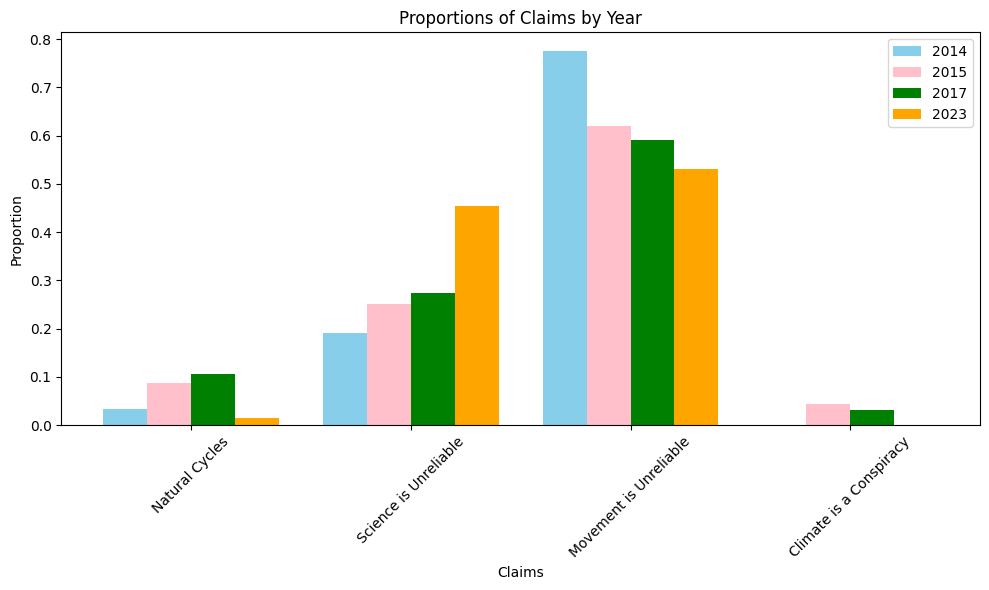

<Figure size 640x480 with 0 Axes>

In [70]:
# Specify the desired order of years
desired_order = [2014, 2015, 2017, 2023]  # Example order, change as needed

# Get unique years in the dataset and sort them in the desired order
unique_years = sorted(df['year'].unique(), key=lambda x: desired_order.index(x))

# Dictionary to store claim proportions for each year
claim_proportions_by_year = {}

# Iterate over each year
for year in unique_years:
    # Filter the DataFrame for the current year
    df_year = df[df['year'] == year]
    
    # Count the total number of claims within the current year
    total_claims_year = df_year['claim'].count()
    
    # Calculate proportions for each claim type within the current year
    claim_proportions_year = df_year['claim'].value_counts() / total_claims_year
    
    # Sort claim proportions by claim types
    claim_proportions_year_sorted = claim_proportions_year.sort_index()
    
    # Store claim proportions for the current year
    claim_proportions_by_year[year] = claim_proportions_year_sorted

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width
bar_width = 0.2

# Define offset for each bar group
offset = np.arange(len(claim_proportions_by_year[next(iter(claim_proportions_by_year))]))

# Define colors for each year
colors = ['skyblue','pink', 'green', 'orange']

# Iterate over each year and plot bars
for i, (year, proportions) in enumerate(claim_proportions_by_year.items()):
    ax.bar(offset + i * bar_width, proportions.values, bar_width, label=year, color=colors[i])

ax.set_xlabel('Claims')
ax.set_ylabel('Proportion')
ax.set_title('Proportions of Claims by Year')
ax.legend()

plt.xticks(offset + (len(unique_years) - 1) * 0.5 * bar_width, proportions.index, rotation=0)  # Set x-axis tick labels horizontal
ax.set_xticklabels(['Natural Cycles', 'Science is Unreliable', 'Movement is Unreliable', 'Climate is a Conspiracy'])  # Set x-axis tick labels horizontal
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('proportions_of_claims.png')